## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [3]:
# using function named 'read_csv' to load the dataset of target, and using 'head()' function to ensure the dataset
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [4]:
# using 'shape' function to get the number of rows and columns of the dataframe
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [5]:
# using 'nunique()' function to get the number of unique user's id in column named 'user_id' of df
df.user_id.nunique()

290584

d. The proportion of users converted.

In [6]:
# because the data in column 'converted' are just 0 and 1, so just using 'mean()' function to get the precentage of users converted
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [7]:
# using logic statement to get the times the 'new_page' and 'treatment' don't line up, and using 'sum()' to get the number of times
((df['landing_page'] == 'new_page') != (df['group'] == 'treatment')).sum()

3893

f. Do any of the rows have missing values?

In [8]:
# using 'info()' to get the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
# using logic state to ensure 'group' and 'landing_page' enqual to 'treatment' and 'new_page', and get the df2
df2 = df[(df['group'] == 'treatment') == (df['landing_page'] == 'new_page')]

In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
# using 'nunique()' function to get the number of unique user's id in column named 'user_id' of df2
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
# using 'value_counts()' to get times of each 'user_id' appears in df2
df2.user_id.value_counts().head()

773192    2
630732    1
811737    1
797392    1
795345    1
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [13]:
# using condition state to get the information of row whose 'user_id' equals to 773192
df2[df2.user_id == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
# using 'drop()' function to drop the row whose index equals to 1899
df2 = df2.drop(1899)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
# using 'mean()' to get the probability in df2 of an individual converting
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
# using the number of the control group which converted at same time to divide the number of the control group 
df2.query('group == "control" & converted == 1').shape[0] / df2.query('group == "control"').shape[0]

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
# using query to get the dataframe of the treatment group, and then get the mean of converted to get the probability 
df2.query('group == "treatment"').converted.mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [18]:
# using the number of individuals received the new page to divide the number of all individuals
df2.query('landing_page == "new_page"').shape[0] / df2.shape[0]

0.5000619442226688

e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

The probability of an individual converting in both kinds of page they receive is 11.96%. For an individual who is in the control group, the probability is 12.04%, and the probability that an individual who is in the treatment group converted is 11.88%. So, the probability of users who are in treatment and control group are quite similar with each other and as same as the probability of an individual converting regardless of the page ther receive.Therefore, we cannot state with certainty that one page leads to more conversions. This is even more important due to almost similar perforamnce of both pages.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

Null hypotheses: **$p_{new}$**-**$p_{old}$** <= 0

Alternative hypoheses: **$p_{new}$**-**$p_{old}$** > 0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [19]:
# computer new convert success rate which equals to the converted success rate regardless of page
p_new = df2.query('converted == 1').shape[0] / df2.shape[0]
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [20]:
# computer new convert success rate which equals to the converted success rate regardless of page
p_old = df2.query('converted == 1').shape[0] / df2.shape[0]
p_old

0.11959708724499628

c. What is $n_{new}$?

In [21]:
# computer the number of users who have new page in df2
n_new = df2.query('landing_page == "new_page"').shape[0]
n_new

145310

d. What is $n_{old}$?

In [22]:
# computer the number of users who have old page in df2
n_old = df2.query('landing_page == "old_page"').shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [23]:
# simulate n_new transactions with a convert rate of p_new under the null
new_page_converted = np.random.choice([0,1], n_new, p = (p_new, 1-p_new))
new_page_converted

array([1, 1, 1, ..., 1, 1, 1])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [24]:
# simulate n_old transactions with a convert rate of p_old under the null
old_page_converted = np.random.choice([0,1], n_old, p = (p_old, 1-p_old))
old_page_converted

array([1, 1, 1, ..., 1, 1, 1])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [25]:
# computer the proportion of new page converted
new_page_converted.mean()
# computer the proportion of old page converted
old_page_converted.mean()
# computer p_new - p_old for simulated values from part(e) and (f)
new_page_converted.mean() - old_page_converted.mean()

-0.0004656859054538165

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [26]:
# because both of new page's and old page's transactions are binomial distributions, we can use np.random.binomial() to simulate
new_page_simulated = np.random.binomial(n_new, p_new, size=10000)/n_new
old_page_simulated = np.random.binomial(n_old, p_old, size=10000)/n_old

p_diffs = new_page_simulated - old_page_simulated

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

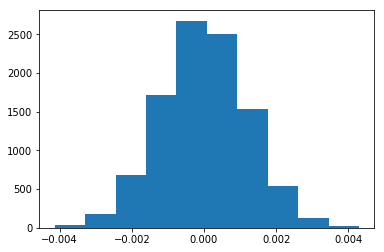

In [27]:
plt.hist(p_diffs);

Yes, it looks like what I expected that the distribution of a sample statistics approximates normal distribution with a large sample size based on Central Limit Theorem.

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [28]:
# Compute observed difference in converted rate
actul_new_converted = df2.query('landing_page == "new_page" & converted == 1').shape[0] / df2.query('landing_page == "new_page"').shape[0]
actul_old_converted = df2.query('landing_page == "old_page" & converted == 1').shape[0] / df2.query('landing_page == "old_page"').shape[0]
obs_diff = actul_new_converted - actul_old_converted

# Creating a distribution under null hypotheses
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)

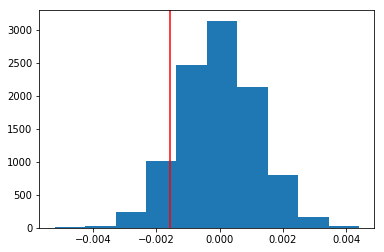

In [29]:
plt.hist(null_vals)
plt.axvline(x=obs_diff,color ='red');

In [30]:
#Compute proportion of the p_diffs are greater than the actual difference observed in ab_data.csv
(null_vals > obs_diff).mean()

0.90910000000000002

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

Under the null hypothese that the conversion rate of the control and treatment group are the same, the probability of observing a value greater than the actual difference in the data is about 90.48% which means the p-value is 0.9048 > 0.05 which is type I error rate, we cannot reject the null. So, the data displays that the old page have the higher probability of convert rate than new page based on type I error rate is 0.05.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [31]:
import statsmodels.api as sm

convert_old = df2.query('landing_page == "old_page" & converted == 1').shape[0]
convert_new = df2.query('landing_page == "new_page" & converted == 1').shape[0]
n_old = df2.query('landing_page == "old_page"').shape[0]
n_new = df2.query('landing_page == "new_page"').shape[0]

/Users/john/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [32]:
z_score, p_value = sm.stats.proportions_ztest(np.array([convert_new,convert_old]),np.array([n_new,n_old]), alternative = 'larger')
z_score, p_value 

(-1.3109241984234394, 0.90505831275902449)

In [33]:
from scipy.stats import norm
# Tells us how significant our z-score is
n_1 = norm.cdf(z_score)
# Tells us what our critical value at 95% confidence is
n_2 = norm.ppf(1-0.05)

n_1,n_2

(0.094941687240975514, 1.6448536269514722)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

Before the test, I have picked a significance level which is 95%. Since the z-score of 1.3109241984234394 doesn’t exceeds the critical value of 1.6448536269514722, so I cannot reject the null hypothese that old page users has a better or equal converted rate than old page users. So, the results agree with the findings in parts j. and k..

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Binary logistic regression.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [110]:
# create a column for intercept and an 'ab_page' column
df2['ab_page'] = pd.get_dummies(df2.landing_page)['new_page']
df2['intercept'] = 1
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [114]:
# create logit regression model for converted variable, ab page
lo = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
result = lo.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [132]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Thu, 12 Jul 2018   Pseudo R-squ.:               8.077e-06
Time:                        15:48:07   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

The p-value associated with ab_page is 0.190. The null is that there is no difference between the treatment and control group, and alternative hypothese is that there is difference between the treatment and control group. The p-value differs from the value I found in the Part II, and the reason is that there are two different hypothesis tests theoretically, so the results of the p-value are different.

In Part II, I test whether the observed conversion rates for those who receive new page are greater than those who receive old page, which means it is a one-tailed test, and in this part, the statistical test for estimated coefficients in regression is a two-tailed test. So, the p-values are different.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

Other factors like time(timestamp variable) might influence the individual converts. I can check whether the converted rate depends on certain time of the day or certain day when user browerse the websites. Futhermore, I can convert time as catergorical variable which includes "Morning, Afternoon, and Evening", or "Weekday or Weekends". The reason why it is a good idea to consider other factors is that other predictors can potentially be more effective in explaining the observed outcome, and single factor cannot statistically explain the outcome sometimes.

The **disadvantages** of adding additional terms into the regression model is that it will make the model more complex to interpretate, and if new terms are dependable variable with the existing explanatory term, it may need to add higher order term to predict the result better somtimes.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [115]:
# read new .csv file, and look the head of this file
c = pd.read_csv('countries.csv')
c.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [116]:
# join ab dataset with country dataset
df3 = df2.merge(c, on ='user_id', how='left')
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,0,US


In [119]:
# check the unique variables in column 'country'
df3['country'].unique()

array(['US', 'CA', 'UK'], dtype=object)

In [123]:
# create a column for 'country' column
df3['intercept'] = 1

df3[['CA','UK']] = pd.get_dummies(df3['country'])[['CA', 'UK']]

In [128]:
# create a logitic regression model for converted variable, counrty, ab_page
lo_1 = sm.Logit(df3['converted'], df3[['intercept', 'ab_page','CA', 'UK']])
results_1 = lo_1.fit()
results_1.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Thu, 12 Jul 2018   Pseudo R-squ.:               2.323e-05
Time:                        15:39:33   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

As we can see, all p-values about the coutry terms are more than 0.05, so it appears that country had nonsiginificant impact on conversion.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [127]:
# create an interaction between ab_page and conurty CA and UK
df3['ab_page_CA'] = df3['ab_page']*df3['CA']
df3['ab_page_UK'] = df3['ab_page']*df3['UK']

In [129]:
#Create logistic regression for the intereaction variable between new page and country using dummy variable
lo_2 = sm.Logit(df3['converted'], df3[['intercept', 'ab_page','CA', 'UK', 'ab_page_CA', 'ab_page_UK']])
results_2 = lo_2.fit()
results_2.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Thu, 12 Jul 2018   Pseudo R-squ.:               3.482e-05
Time:                        15:40:43   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page       -0.0206      0.014     -1.505      0.132      -0.047       0.006
CA            -0.0175      0.038     -0.465      0.642      -0.091       0.056
UK            -0.0057      0.019     -0.306      0.760      -0.043       0.031
ab_page_CA    -0.0469      0.054     -0.872      0.383      -0.152       0.059
ab_page_UK     0.0314      0.027      1.181      0.238      -0.021       0.084
==============================================================================
"""

As we can see, all the p-values are more than 0.05, so it appears that none of the predictors can  explain our outcome statistically significant.
Also, the coefficient of interaction variable "ab_page_CA" and "ab_page_UK" are different from the coefficient "ab_page" itself, and the Z-score of all X variables are not large enough for predicting converted rate.
Therefore, the country is not significant on the converted rate considering the page the user land in.

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by continuing on to the next module in the program.